# TD : SQL - Auto-Jointure

Les organisateurs d'un festival de cinéma répertorient les films diffusés, leurs réalisateurs, les salles dans lesquelles ils sont diffusés ainsi que la programmation horaire.

Le festival dure deux jours avec quatre créneaux chaque jour notés 1; 2; 3; 4 pour le premier jour et 11; 12; 13; 14 pour le second jour.

On donne ci-dessous le schéma de la base de donnée utilisée
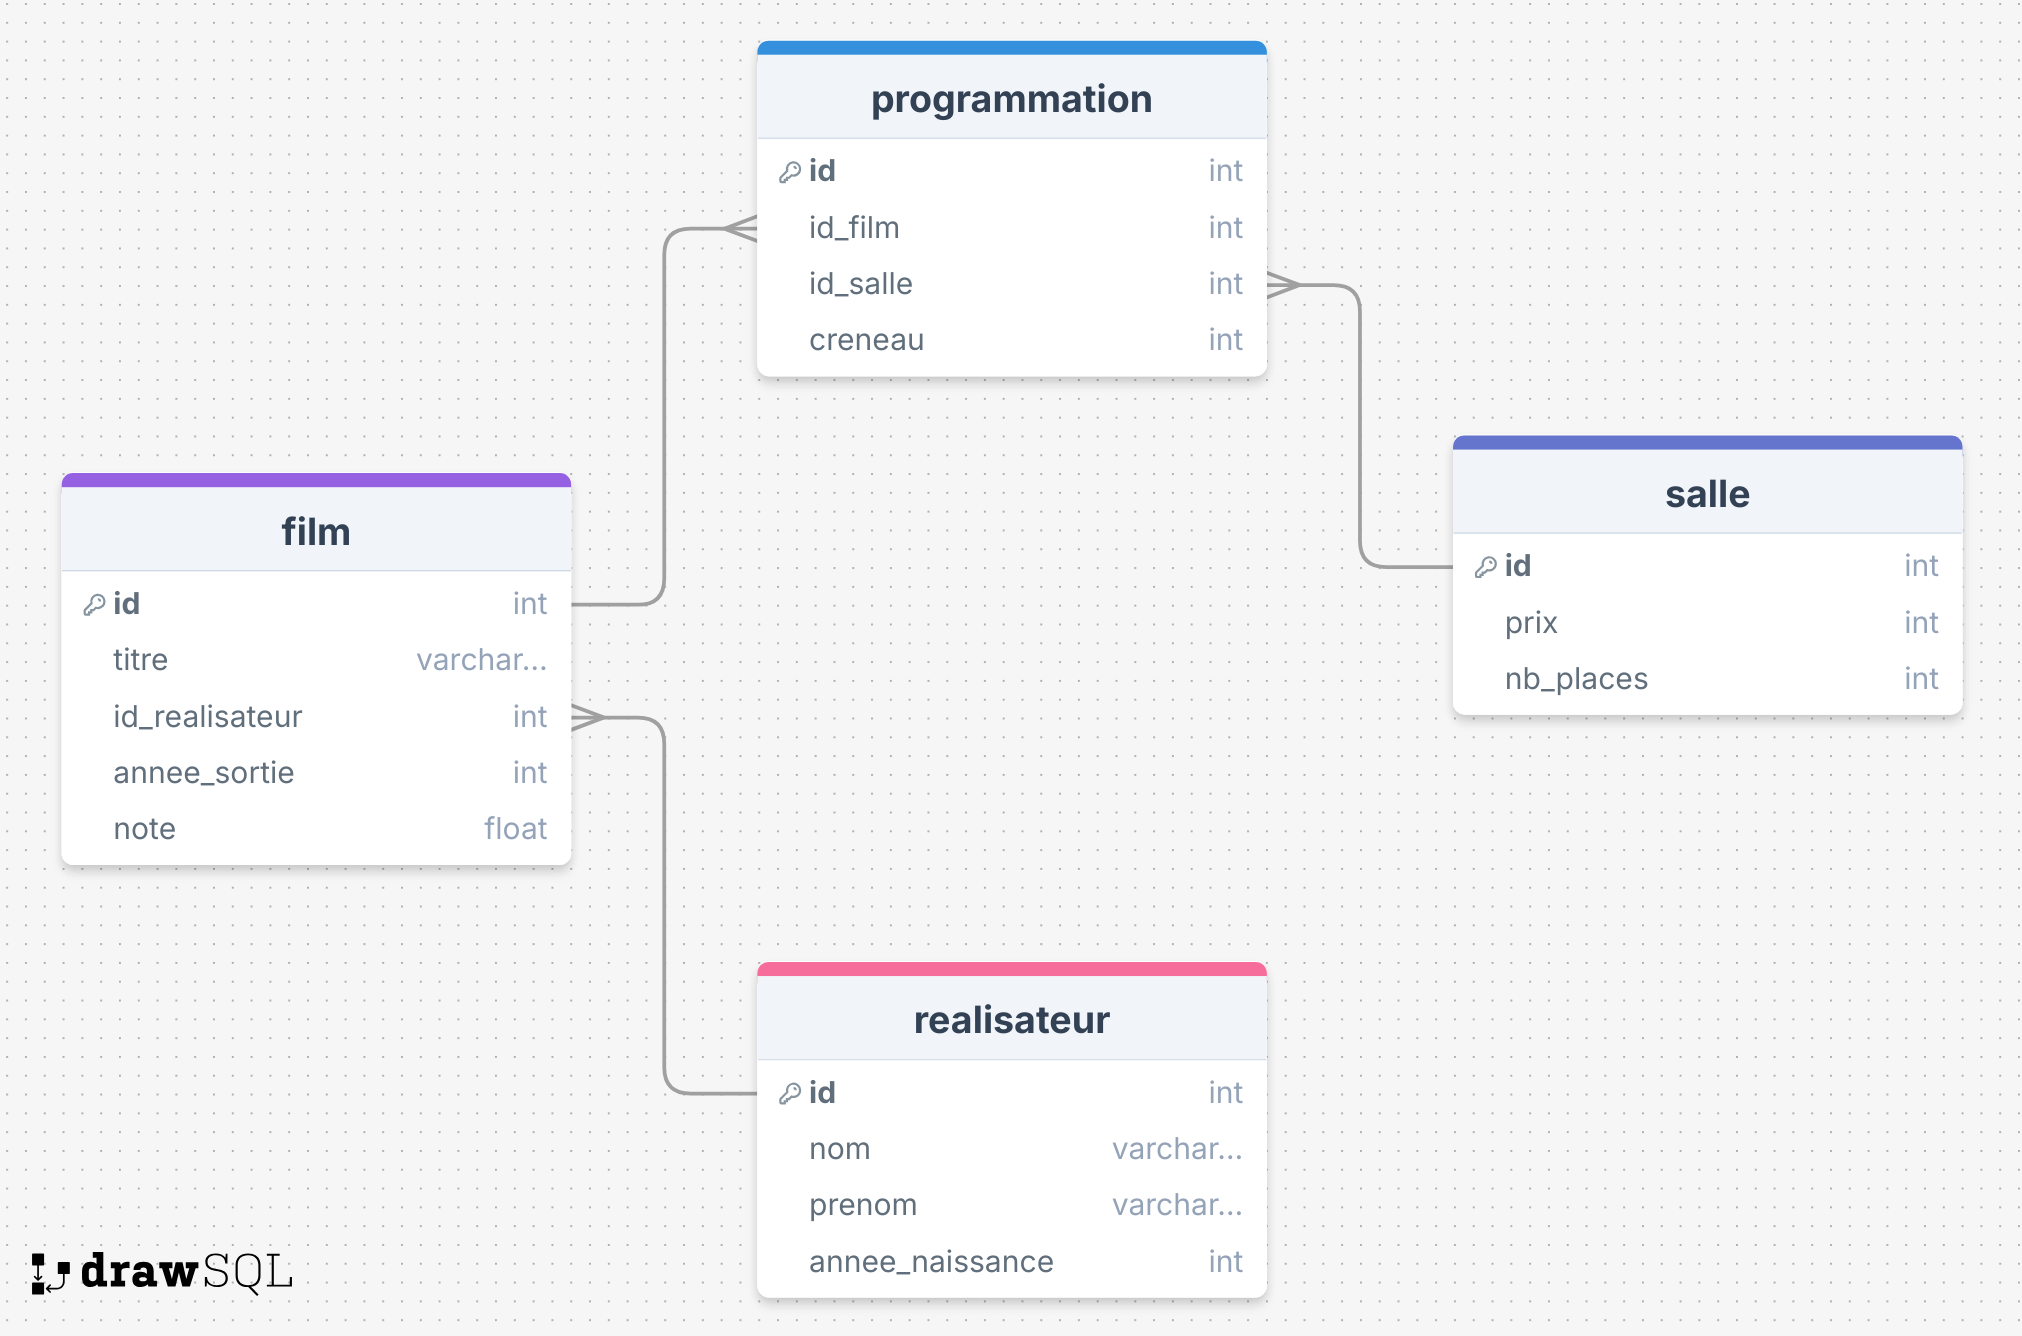

## Rappels

**Commande WHERE**

La commande WHERE permet de selectionner seulement les lignes d'une table remplissant une certaine condition.

In [ ]:
SELECT * FROM film
WHERE annee_sortie >= 2015

On peut également selectionner des colonnes et de l'ordre d'affichage afin de rendre la table plus lisible et d'enlever les informations inutiles.

In [ ]:
SELECT titre, annee_sortie FROM film
WHERE annee_sortie >= 2015
ORDER BY annee_sortie ASC

**A propos des conditions** : on dispose des conditions "AND", "OR" et "NOT" mais également de "LIKE" qui permet de rechercher des chaînes de caractères à une ou plusieurs lettres près :
- On utilise "%for%" pour rechercher une chaîne contenant le mot "for".
- On utilise "\_he thingy" pour rechercher une chaîne coïncidant au "\_" près à la chaîne donnée

In [ ]:
SELECT titre FROM film
WHERE titre LIKE "The%" AND note >= 3.0

Commande INNER JOIN

In [ ]:
SELECT * FROM film

INNER JOIN realisateur
ON film.id_realisateur = realisateur.id

Le résultat d'une requête SQL est une table sur laquelle on peut effectuer les opérations usuelles.

In [ ]:
SELECT * FROM film

INNER JOIN realisateur
ON film.id_realisateur = realisateur.id

WHERE nom LIKE "_o%e" OR note >= 4.7

## 2) Auto-Jointure

Problématique : La programmation a été faite et doit être vérifiée. Il ne faut pas que deux films soient prévus dans la même salle sur le même créneau. Vérifions s'il y a des erreurs et où grâce à des requêtes SQL.

L'auto-jointure consiste à effectuer une jointure entre une table et elle-même.

In [ ]:
SELECT film1.titre as film_A , film2.titre as film_B, p1.id_salle, p1.creneau 
FROM programmation as p1

INNER JOIN programmation as p2
ON p1.id_salle = p2.id_salle AND p1.creneau = p2.creneau AND p1.id <> p2.id

On peut cumuler l'auto-jointure avec des jointures externes pour remplacer les id des films (peu lisibles) par leurs titres.

In [ ]:
SELECT film1.titre as film_A , film2.titre as film_B, p1.id_salle, p1.creneau 
FROM programmation as p1

INNER JOIN programmation as p2
ON p1.id_salle = p2.id_salle AND p1.creneau = p2.creneau AND p1.id <> p2.id

INNER JOIN film as film1
ON p1.id_film = film1.id

INNER JOIN film as film2
ON p2.id_film = film2.id

Dans la table obtenue, on a deux fois une ligne contenant Hanoy towers et Living pool. Pour éviter cela, on peut imposer que l'id du film A soit plus petit que celui du film B. (ce qui évite d'avoir les combinaisons id_A,id_B ET id_B,id_A)

In [ ]:
SELECT film1.titre as film_A , film2.titre as film_B, p1.id_salle, p1.creneau 
FROM programmation as p1

INNER JOIN programmation as p2
ON p1.id_salle = p2.id_salle AND p1.creneau = p2.creneau AND p1.id <> p2.id

INNER JOIN film as film1
ON p1.id_film = film1.id

INNER JOIN film as film2
ON p2.id_film = film2.id

WHERE id_film_A < id_film_B

---------------------------------------------------------------

Autre moyen de remarquer qu'il y a des erreurs (sans savoir où) :

In [ ]:
SELECT creneau, id_salle, COUNT(*) FROM programmation
GROUP BY creneau, id_salle
HAVING COUNT(*) > 1